In [ ]:
# Charles Nguyen HW7

In [ ]:
# Observations

#1 Majority of tweets are neutral.
#2 For today's data, @foxnews has the most positive tweets.
#3 @bbcnews posts the most negative tweets between all news organizations observed.

In [1]:
# Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests as reqs
import tweepy
import json
import time

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Twitter API Keys
consumer_key = "tIZ2XiI8vNVadgJbcraPofPDU"
consumer_secret = "illoEp1AY8WCnmLrCwD1yUrrCgB9w5XUFStgXVShGhlphiWeeC"
access_token = "937017463102832640-8nTjGBdVxZA1OnhLEgw8js5hYWWo58o"
access_token_secret = "HU4lM9ZTeDxi5Qp9rtm4WrMQXABrANSB6OXt3NlLwDCPw"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:
# List of news orgs
news_orgs = ["@bbcnews", "@CBSNews", "@foxnews", "@cnnbrk", "@nytimes"]
sentiments = []

In [4]:
# Loop through news listing, 100 tweets per news listing.
for news in news_orgs:
    counter = 1       
    for item in tweepy.Cursor(api.user_timeline, id=news).items(100):
        tweet = json.dumps(item._json, indent=3)
        tweet = json.loads(tweet)
        text = tweet['text']
        
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        
        news_dict = {
            'Source':news,
            'Date': tweet["created_at"],
            'Text': text,
            'Compound': compound,
            'Positive': pos,
            'Negative': neg,
            'Tweets_Ago': counter
        }
        
        sentiments.append(news_dict)
        counter +=1      

In [5]:
news_sentiment_df = pd.DataFrame.from_dict(sentiments)
news_sentiment_df.head()

,Compound,Date,Negative,Positive,Source,Text,Tweets_Ago
0,0.2500,Fri Dec 15 02:18:16 +0000 2017,0.193,0.281,@bbcnews,V Festival: 'No police stationed' at 2017 even...,1
1,-0.2732,Fri Dec 15 02:18:16 +0000 2017,0.259,0.000,@bbcnews,Schools warned over hackable heating systems h...,2
2,0.0000,Fri Dec 15 02:18:15 +0000 2017,0.143,0.143,@bbcnews,"Russia a 'risk' to undersea cables, defence ch...",3
3,0.0000,Fri Dec 15 02:18:15 +0000 2017,0.000,0.000,@bbcnews,'Youthquake' declared word of the year by Oxfo...,4
4,-0.1280,Fri Dec 15 02:18:14 +0000 2017,0.176,0.000,@bbcnews,Virgin Trains staff to hold 24-hour strike htt...,5


In [6]:
news_sentiment_df.groupby('Source').Source.count()

Source
@CBSNews    100
@bbcnews    100
@cnnbrk     100
@foxnews    100
@nytimes    100
Name: Source, dtype: int64

In [7]:
# Separate news orgs. to graph
BBC_graph = news_sentiment_df[news_sentiment_df["Source"]=="@BBCNews"]
CBS_graph = news_sentiment_df[news_sentiment_df["Source"]=="@CBSNews"]
CNN_graph = news_sentiment_df[news_sentiment_df["Source"]=="@cnnbrk"]
FoxNews_graph = news_sentiment_df[news_sentiment_df["Source"]=="@foxnews"]
nytimes_graph = news_sentiment_df[news_sentiment_df["Source"]=="@nytimes"]

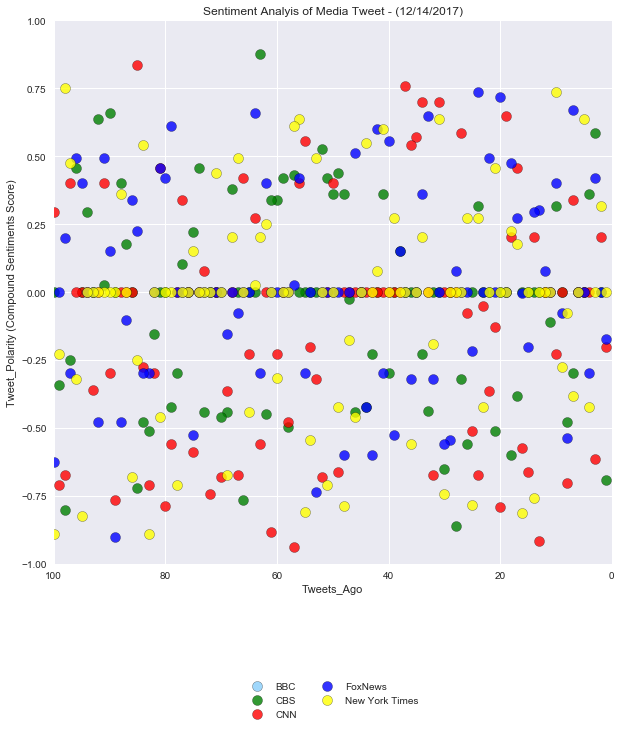

In [12]:
# plot all 5 news orgs. graphs onto 1 graph

plt.figure(figsize=(10,10))

BBC = plt.scatter(BBC_graph['Tweets_Ago'],BBC_graph['Compound'], c='lightskyblue', s=100, 
                  edgecolors='Black', alpha = 0.8, label='BBC')

CBS = plt.scatter(CBS_graph['Tweets_Ago'],CBS_graph['Compound'], c='green', s=100, 
                  edgecolors='Black', alpha = 0.8, label='CBS')

CNN = plt.scatter(CNN_graph['Tweets_Ago'],CNN_graph['Compound'], c='red', s=100, 
                  edgecolors='Black', alpha = 0.8, label='CNN')

FoxNews = plt.scatter(FoxNews_graph['Tweets_Ago'],FoxNews_graph['Compound'], c='blue', s=100, 
                      edgecolors='Black', alpha = 0.8, label='FoxNews')

nytimes = plt.scatter(nytimes_graph['Tweets_Ago'],nytimes_graph['Compound'], c='yellow', s=100, 
                      edgecolors='Black', alpha = 0.8, label='New York Times')

plt.ylim(-1, 1)
plt.xlim(100, 0)

plt.xlabel("Tweets_Ago")
plt.ylabel("Tweet_Polarity (Compound Sentiments Score)")

plt.legend(loc=9, bbox_to_anchor=(.5, -0.2), ncol=2)

# Prints our scatter plot graph to the screen
plt.title("Sentiment Analyis of Media Tweet - (12/14/2017)")
plt.savefig('Sentiment Analyis of Media Tweet.png')
plt.show()


In [13]:
# Group compound sentiments by news and calculate avg. to graph
News_graph = news_sentiment_df.groupby(['Source'])['Compound'].mean()
News_graph = pd.DataFrame(News_graph)
News_graph

,Compound
Source,
@CBSNews,-0.040973
@bbcnews,-0.102065
@cnnbrk,-0.100021
@foxnews,0.018544
@nytimes,-0.049102


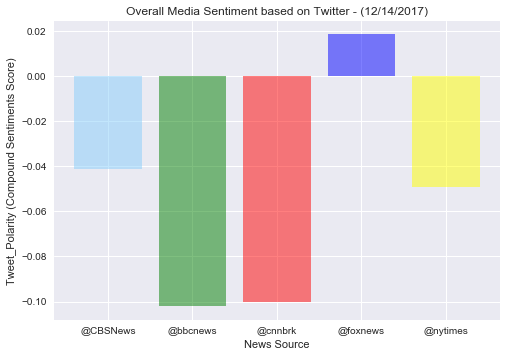

In [14]:
News = ['@CBSNews', '@bbcnews', '@cnnbrk', '@foxnews', '@nytimes']
colors = ['lightskyblue', 'green', 'red', 'blue', 'yellow']
Tweet_Polarity = News_graph['Compound']
ypos = np.arange(len(News))
plt.xticks(ypos,News)

plt.bar(ypos, Tweet_Polarity, align='center', alpha=0.5, color = colors)
 
plt.xlabel("News Source")
plt.ylabel("Tweet_Polarity (Compound Sentiments Score)")

plt.title("Overall Media Sentiment based on Twitter - (12/14/2017)")
plt.savefig("Overall Media Sentiment based on Twitter.png")
plt.show()
